In [ ]:
from random import gauss, seed
from math import sqrt, exp
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import time as t

i vectorized the function if u wanna use it it should run abit faster than before
```python
def generate_value(s0, mu, sigma, n, t):

  stocks = [s0]
  st = s0
  for i in range(n):
    st *= exp((mu - 0.5 * sigma ** 2) * (t / n) + sigma * sqrt(t / n) * gauss(mu=0, sigma=1))
    stocks.append(st)

  return stocks
def test_J(thetas, portfolio):
  rets = (portfolio[:,1] - portfolio[:,0])/portfolio[:,0]
  return np.multiply(thetas, rets).sum()


def test_G(thetas, portfolio):
  jay = test_J(thetas, portfolio) / len(thetas)

  S_t = portfolio[:,1]
  S_0 = portfolio[:,0]
  rets = (S_t - S_0)/S_0 - jay
  g = np.multiply(thetas, rets)

  return g
```

In [ ]:
def generate_value(s0, mu, sigma, n, t):

  stocks = [s0]
  st = s0
  for i in range(n):
    st *= exp((mu - 0.5 * sigma ** 2) * (t / n) + sigma * sqrt(t / n) * gauss(mu=0, sigma=1))
    stocks.append(st)

  return stocks

def port_val(thetas, portfolio):
  return np.dot(thetas, portfolio)

def J(thetas, portfolio):
  rets = (portfolio[:,1] - portfolio[:,0])/portfolio[:,0]
  return np.multiply(thetas, rets).sum()


def G(thetas, portfolio):
  jay = J(thetas, portfolio) / len(thetas)

  S_t = portfolio[:,1]
  S_0 = portfolio[:,0]
  rets = (S_t - S_0)/S_0 - jay
  g = np.multiply(thetas, rets)

  return g

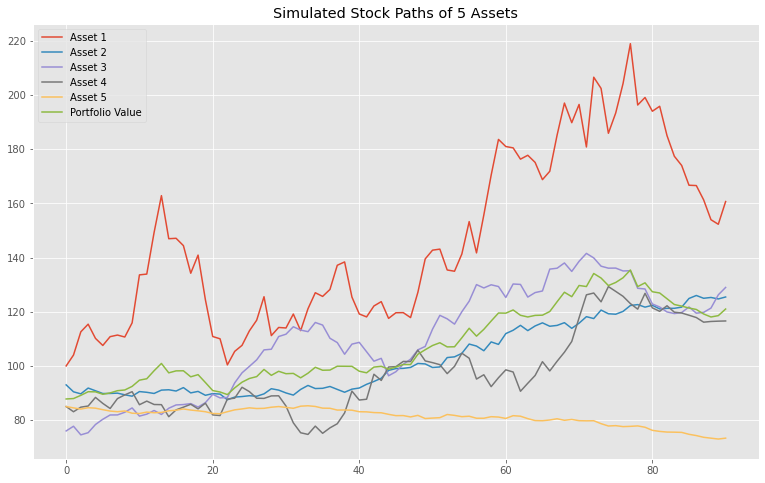

In [ ]:
T = 0.25
n=90
theta = [0.2, 0.2, 0.2, 0.2, 0.2]

S1 = generate_value(100,1.5,1.1,n,T)
S2 = generate_value(93,1,0.25,n, T)
S3 = generate_value(76,2,0.5,n, T)
S4 = generate_value(85,3,0.75,n, T)
S5 = generate_value(85,-0.5,0.1,n, T)
S_t = np.array([S1,S2,S3,S4,S5])

port = port_val(theta, S_t)


fig, ax = plt.subplots(figsize=(13,8))
ax.plot(S_t[0], label="Asset 1")
ax.plot(S_t[1], label="Asset 2")
ax.plot(S_t[2], label="Asset 3")
ax.plot(S_t[3], label="Asset 4")
ax.plot(S_t[4], label="Asset 5")
ax.plot(port, label="Portfolio Value")
ax.set_title("Simulated Stock Paths of 5 Assets")
ax.legend()
fig.show()

In [ ]:
T = 0.25 # quarter
theta = np.array([0.2, 0.3, 0.3, 0.2])
theta_display = [[theta[0]], [theta[1]], [theta[2]], [theta[3]]]
n=1 #number days were breaking up the intervals
N=1

start = t.time()

for i in range(100):
  epsilon = 1/(n+1)
  Yn = np.zeros(len(theta))

  for i in range(N):
    S1 = generate_value(100,1.5,1.1,n,T)
    S2 = generate_value(93,1,0.25,n, T)
    S3 = generate_value(76,1,0.5,n, T)
    S4 = generate_value(10,3,0.01,n, T)
    S_t = np.array([S1,S2,S3,S4])

    Yn = np.add(Yn, np.array(G(theta, S_t)))

  Yn = np.divide(Yn, N)
  theta = np.add(theta, epsilon * Yn)
  theta = np.divide(theta, theta.sum())
  for i in range(len(theta)):
    theta_display[i].append(theta[i])

print("This process takes", t.time() - start, "secs")

This process takes 0.008305549621582031 secs


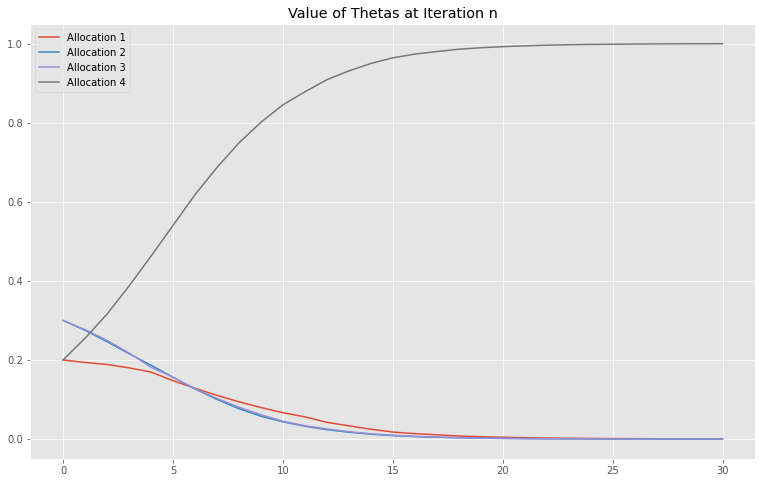

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
ax.set_title("Value of Thetas at Iteration n")
ax.plot(theta_display[0], label="Allocation 1")
ax.plot(theta_display[1], label="Allocation 2")
ax.plot(theta_display[2], label="Allocation 3")
ax.plot(theta_display[3], label="Allocation 4")
ax.legend()
fig.show()